# CSGO Winner Prediction - Group E (GMBD 2020)

#### Predicting whether Counter Strike or Terrorist will be the round winner, using classification models
#### Group members: AMOS M., LI X., PABLO B., SARANG Z., VANIA C.
#### Outline of this notebook:
1. Import libraries and load dataset
2. Exploratory data analysis (EDA)
3. Feature engineering and dimensionality reduction
4. Model selection
5. Cross validation
6. Final model validation and exporting results


#### Reference:
1. Metadata: https://github.com/Skybox-Technologies/csgo-ai-competition/  

---

## 1. Importing libraries & Load dataset

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import category_encoders as ce
import pprint
pp = pprint.PrettyPrinter(indent=4)
# %load_ext nb_black
pd.set_option("display.max_columns", 1000)
pd.set_option("max_seq_items", 1000)
pd.set_option("display.width", 1000)
np.set_printoptions(threshold=np.inf)

In [3]:
df_entire = pd.read_csv("csgo_round_snapshots.csv")
df = pd.read_csv("modeling_set.csv")
print(
    "There are {} columns and {} rows in the raw dataset".format(
        df_entire.shape[1], df_entire.shape[0]
    )
)
df_entire.head()

There are 97 columns and 122410 rows in the raw dataset


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


---

## 2. EDA

#### Using entire dataset ("csgo_round_snapshots.csv"), from Kaggle

### 2.1 Checking column names, datatypes and quick stats

In [11]:
print(df_entire.columns)

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90',
       'ct_weapon_r8re

In [12]:
print(df_entire.dtypes.unique())

[dtype('float64') dtype('O') dtype('bool')]


*The dataset is organized by `ct_` and `t` columns on the same attribute side-by-side. Without plotting correlation, it's reasonable to suspect that there will be high (negative) correlations between ct and t columns.*

In [14]:
df_entire.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,0.004011,0.001773,0.110138,0.004738,0.0,0.000792,0.011045,0.110301,0.006919,3.310195,0.000008,0.0,0.063818,0.002729,1.076236,0.052733,0.007557,0.107311,0.004403,0.000049,0.001462,0.002753,0.002034,0.001952,0.146998,0.005645,0.0,0.000008,0.000980,0.000106,0.000163,0.000155,0.0,0.000057,0.0,0.000139,0.000719,0.000008,0.239147,0.824941,0.059505,0.020440,0.046426,0.036468,0.007557,0.000261,0.440675,0.380868,0.061751,0.009386,3.179789,0.122400,0.236974,0.291618,0.174046,0.004934,0.008120,0.028323,0.899101,0.438257,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,0.063206,0.042067,0.388980,0.070780,0.0,0.037148,0.112130,0.405933,0.086935,1.625785,0.002858,0.0,0.262884,0.053096,1.219112,0.247009,0.094191,0.41

*There are some skewed data, like `ct_money` and `t_money` columns*

### 2.2 Missing and Constant values

In [7]:
missing = 100 * df_entire.isnull().sum() / df_entire.isnull().count().sort_values(ascending=False)
# pd.DataFrame(missing, columns=['column','perc_missing'])
print(missing)

bomb_planted               0.0
ct_armor                   0.0
ct_defuse_kits             0.0
ct_grenade_decoygrenade    0.0
ct_grenade_flashbang       0.0
                          ... 
t_weapon_tec9              0.0
t_weapon_ump45             0.0
t_weapon_usps              0.0
t_weapon_xm1014            0.0
time_left                  0.0
Length: 97, dtype: float64


*There are no missing values*


In [108]:
constant_col = []
for i in df_entire.columns:
    if len(df_entire[i].unique()) ==1:
        print('{} is a column which only has value {}'.format(i,df_entire[i].unique()))
        constant_col.append(i)

ct_weapon_bizon is a column which only has value [0.]
ct_weapon_g3sg1 is a column which only has value [0.]
t_weapon_m249 is a column which only has value [0.]
ct_weapon_negev is a column which only has value [0.]
ct_weapon_r8revolver is a column which only has value [0.]
ct_weapon_sawedoff is a column which only has value [0.]


*These columns all contain only `0`, which are not informative to the model. Removing them from the dataset when we fit algorithms*


### 2.3 Visualizing attributes distribution and correlations

In [15]:
# Separate variables by data types

numerical_var = [i for i in df_entire.columns if df_entire[i].dtypes == "float64"]
categorical_var = [i for i in df_entire.columns if df_entire[i].dtypes != "float64"]

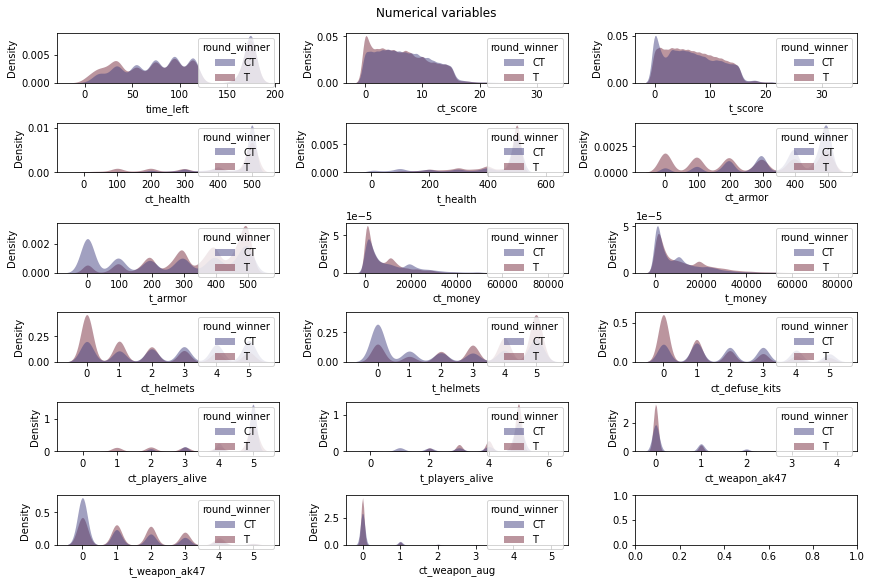

In [32]:
# select some numerical features to plot

to_plot = numerical_var[:17]

num_plots = len(to_plot)
num_cols = 3
num_rows = num_plots // num_cols +1 

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)
fig.suptitle('Numerical variables')

for subplot, feature in enumerate(to_plot):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.kdeplot(
        data=df_entire,
        x=feature,
        palette="icefire",
        alpha=0.5,
        linewidth=0,
        fill=True,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

*Some expected patterns from observing the numerical variables, for example:
when one team has a higher number in money, or apparatus, or players alive, that team tends to win.
CT side tends to win the round faster (more time left)*
    

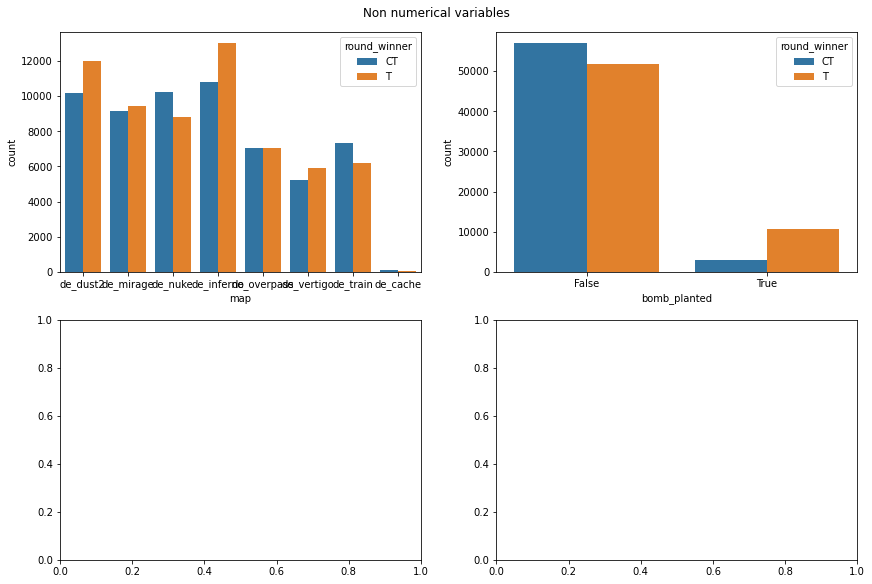

In [53]:
# Bar chart for non-numerical columns

fig, axs = plt.subplots(2,2,constrained_layout=True)
fig.set_size_inches(12, 8)
fig.suptitle('Non numerical variables')

sns.countplot(
        data=df_entire,
        x='map',
        hue="round_winner",
        ax=axs[0][0],
    )

sns.countplot(
        data=df_entire,
        x='bomb_planted',
        hue="round_winner",
        ax=axs[0][1],
    )
plt.show()


*2 maps are more favorable to T, 1 map is favorable to CT. bomb_planted is important to T*


### 2.4 Correlation matrix

Separate the `ct_` columns and `t_` columns to study more about correlations:

In [61]:
t = [colname for colname in df_entire.columns if colname.startswith('t_')]
print(t)

['t_score', 't_health', 't_armor', 't_money', 't_helmets', 't_players_alive', 't_weapon_ak47', 't_weapon_aug', 't_weapon_awp', 't_weapon_bizon', 't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas', 't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_glock', 't_weapon_m249', 't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7', 't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 't_weapon_negev', 't_weapon_nova', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 't_weapon_scar20', 't_weapon_sg553', 't_weapon_ssg08', 't_weapon_ump45', 't_weapon_xm1014', 't_weapon_deagle', 't_weapon_fiveseven', 't_weapon_usps', 't_weapon_p250', 't_weapon_p2000', 't_weapon_tec9', 't_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade', 't_grenade_molotovgrenade', 't_grenade_decoygrenade']


*We can largely group the information into 4 main categories:*
*1. General (timeleft, score, health, money, players_alive, map)*
*2. Weapons*
*3. Grenades*
*4. Protective and other equipment (armor, helmets, defuse_kits)*

Look at the correlation within one side attribute:

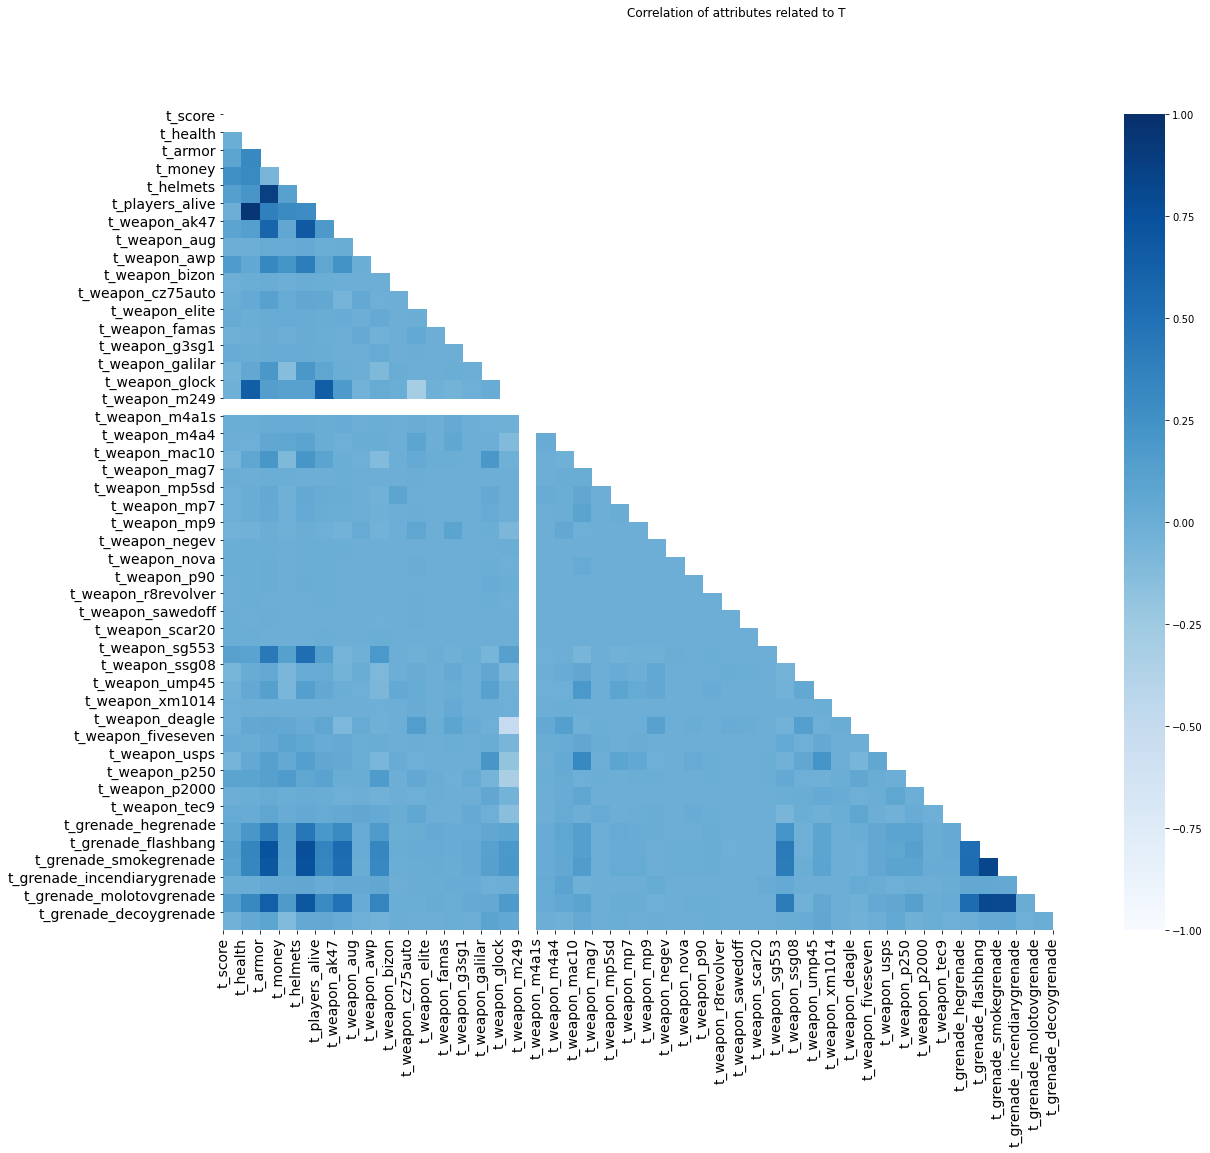

In [65]:
df_corr = df_entire[t].corr()
mask = np.triu(np.ones_like(df_corr))

fig, ax = plt.subplots(figsize = (19,15))
fig.suptitle('Correlation of attributes related to T')
sns.heatmap(df_corr,mask=mask,cmap='Blues',fmt='.2f',vmin=-1,vmax=1)

plt.xticks(range(df_entire[t].shape[1]), df_entire[t].columns, fontsize=14, rotation=90)
plt.yticks(range(df_entire[t].shape[1]), df_entire[t].columns, fontsize=14)
plt.show()

* *Players alive and health highly correlated*
* *Armor and helmets highly correlated*
* *Grenades are relatively highly correlated with armor and helmets*
* *Diferent types of grenades are highly correlated with each other*

`t_money` and `t_players_alive`, `t_health` 

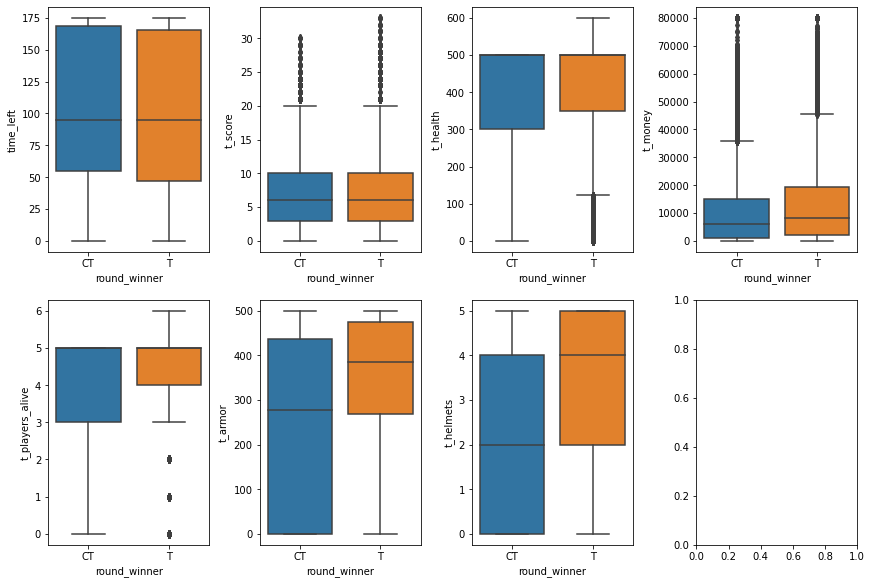

In [66]:
feature_ls = ['time_left','t_score','t_health','t_money','t_players_alive','t_armor','t_helmets']

num_plots = len(feature_ls)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df_entire,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()


Weapon and grenade usage by the two sides

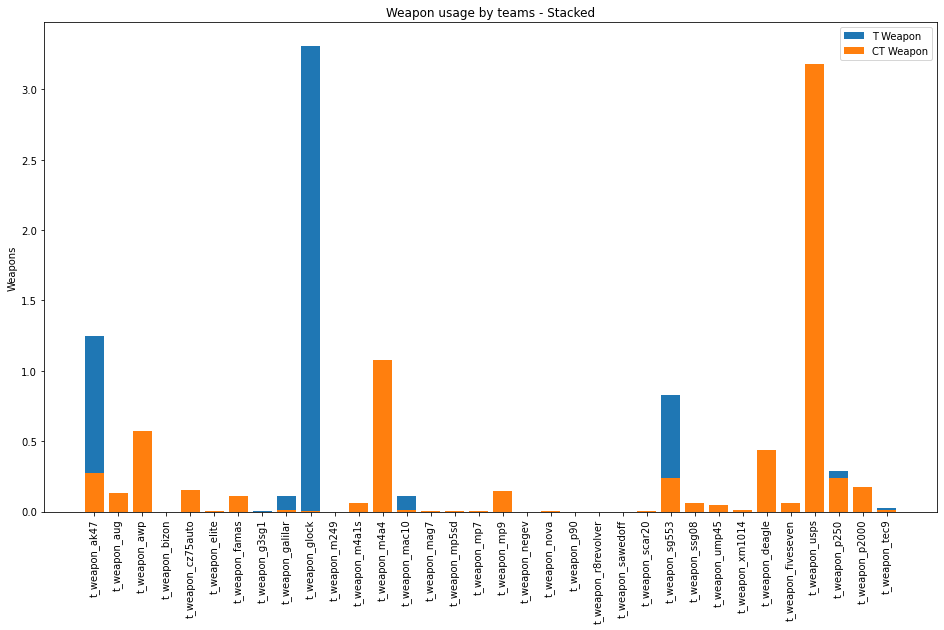

In [73]:
t_weapon = [colname for colname in df_entire.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in df_entire.columns if colname.startswith('ct_weapon')]

fig, ax = plt.subplots(figsize=(16,9))

t_data = df_entire[t_weapon].mean()
ct_data = df_entire[ct_weapon].mean()
x_pos = np.arange(len(t_weapon))

ax.bar( x_pos, t_data, label = 'T Weapon',)
ax.bar( x_pos, ct_data, label = 'CT Weapon',)

ax.set_ylabel('Weapons')
ax.set_title('Weapon usage by teams - Stacked')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(t_weapon)
plt.xticks(x_pos, t_weapon, rotation=90)
ax.legend()


Text(0.5, 1.0, 'Grenades Usage by teams - Stacked')

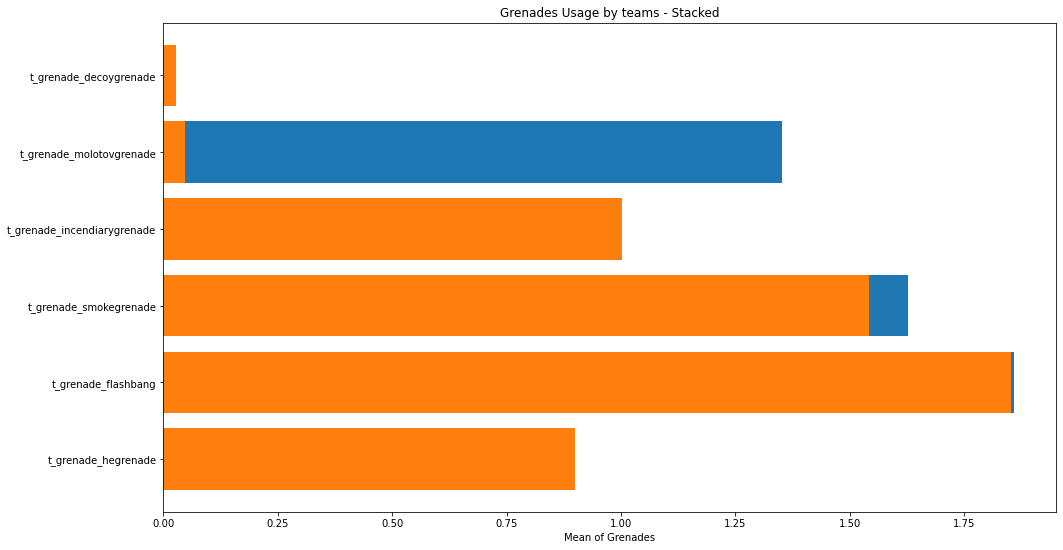

In [72]:
t_grenade = [colname for colname in df_entire.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in df_entire.columns if colname.startswith('ct_grenade')]

fig, ax = plt.subplots(figsize=(16,9))

x = df_entire[t_grenade].mean()
y_pos = np.arange(len(t_grenade))

ax.barh(y_pos, x,align='center',label = 'T Grenades',)
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 

x = df_entire[ct_grenade].mean()
y_pos = np.arange(len(ct_grenade))

ax.barh(y_pos, x,align='center', label = 'CT Grenades')
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 
ax.set_xlabel('Mean of Grenades')
ax.set_title('Grenades Usage by teams - Stacked')


Weapon usage seem quite different between 2 teams - partly due to some weapons are only available to one side;
Grenade usage is not that different, apart from the Molotov grenade

## 3. Feature Engineering and Dimensionality Reduction

Using modeling dataset ("modeling_set.csv")

#### 3.0 Define a function to do scaling, train/test split, fitting and evaluation at once, because we will be running this multiple times

In [132]:
score = []
name = []


def rf_predictor(df,var,model_version, target='round_winner',test_size=0.3,random_state=42,
                n_estimators=700,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=40,
                bootstrap=False):
    """The main function that takes in a dataset, variables and outputs model performance and feature importance"""
    
    # scaling variables
#     scaler = StandardScaler().fit(df[var])
    scaler = RobustScaler().fit(df[var])
    X = scaler.transform(df[var])
    
    # train/test split
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # fit model and make prediction
    rf = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,max_features=max_features,
                                max_depth=max_depth, bootstrap=bootstrap, random_state=1
                               )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # obtain accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    name.append(model_version)

    model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
    print(model_performance)
    print('---------------------------------------')
    
    # top 13 feature importance
    
    feature_importance = pd.DataFrame({'feature':var,'importance':rf.feature_importances_})
    feature_importance.sort_values(by='importance',inplace=True, ascending = False)
    
    print(feature_importance[0:13])
    
    # return the model for later use
    return rf

#### 3.1 Before diving into FE, run a `baseline` model with all numerical features with randomForest

In [98]:
numerical_var = [i for i in df.columns if df[i].dtypes == "float64"]
target = 'round_winner'

rf_predictor(df = df, var=numerical_var, model_version = 'rf baseline all numerical')

                       model  Accuracy
0  rf baseline all numerical   0.86031
---------------------------------------
                 feature  importance
6                t_armor    0.076780
5               ct_armor    0.075610
8                t_money    0.057201
7               ct_money    0.056380
10             t_helmets    0.044127
0              time_left    0.043008
4               t_health    0.034133
2                t_score    0.033786
1               ct_score    0.033532
3              ct_health    0.032796
9             ct_helmets    0.032304
11        ct_defuse_kits    0.030608
84  ct_grenade_flashbang    0.028290


#### 3.2 Removing outliers 

Because in the EDA we saw some columns are skewed

In [99]:
from sklearn.ensemble import IsolationForest

In [100]:
X, y = df[numerical_var].values, df[target].values
print("Before removing outliers:", X.shape, y.shape)

iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(X)

mask = yhat != -1
X, y = X[mask, :], y[mask]
print("After removing outliers:", X.shape, y.shape)

Before removing outliers: (85687, 94) (85687,)
After removing outliers: (84830, 94) (84830,)


In [101]:
y = pd.DataFrame(y, columns=[target])
X = pd.DataFrame(X, columns=numerical_var)

df_1 = pd.concat((X, y), axis=1)
df_1.shape

(84830, 95)

In [102]:
rf_predictor(df = df_1, var=numerical_var, model_version = 'rf baseline all numerical remove outlier')

                                      model  Accuracy
0                 rf baseline all numerical  0.860310
1  rf baseline all numerical remove outlier  0.858383
---------------------------------------
                 feature  importance
6                t_armor    0.077742
5               ct_armor    0.075225
8                t_money    0.057130
7               ct_money    0.056530
10             t_helmets    0.045493
0              time_left    0.042714
4               t_health    0.034619
2                t_score    0.033816
9             ct_helmets    0.033589
1               ct_score    0.033392
3              ct_health    0.032406
11        ct_defuse_kits    0.032145
84  ct_grenade_flashbang    0.028715


*Removing outliers didn't improve the model*

#### 3.2 Feature encoding
We have 1 categorical variable, `map` and 1 boolean varaible `bomb_planted`. We'll use catboost encoder to transform `map` into numerical values.

In [133]:
categorical_var = ["map", "bomb_planted"]
target = 'round_winner'

In [134]:
# Create the Catboost encoder, and "fit" + "transform" our data.

# target value has to be numerical in catboost encoder
nu_target = [1 if x == 'CT' else 0 for x in df[target] ]


# encoding 
catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(df[categorical_var],nu_target)
new_columns.add_suffix('_cb')

,map_cb,bomb_planted_cb
0,0.490191,False
1,0.490191,False
2,0.490191,False
3,0.745096,False
4,0.496730,False
...,...,...
85682,0.536471,False
85683,0.499848,False
85684,0.536506,False
85685,0.491778,False


In [135]:
data_coded = df.drop(['map','bomb_planted'],axis=1)
data_coded = pd.concat((data_coded,new_columns),axis=1)

In [136]:
var = list(set(data_coded.columns) - set([target]))

rf_predictor(df = data_coded, var=var, model_version = 'rf baseline encoded')

                 model  Accuracy
0  rf baseline encoded  0.863617
---------------------------------------
           feature  importance
85         t_armor    0.073704
52        ct_armor    0.071745
53         t_money    0.052983
83        ct_money    0.051708
60             map    0.048003
68       t_helmets    0.044017
47       time_left    0.038604
45        t_health    0.032947
17      ct_helmets    0.031449
21         t_score    0.031134
76        ct_score    0.030927
28       ct_health    0.030045
93  ct_defuse_kits    0.030028


RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700,
                       random_state=1)

*Adding in encoded variables did improve the model. Now need to dig deeper into the dataset itself.*

#### 3.3 Removing columns with constant values

In [109]:
data_coded.drop(constant_col,axis=1,inplace=True)
var = list(set(data_coded.columns) - set([target]))
rf_predictor(df = data_coded, var=var, model_version = 'rf removing constants')

                                      model  Accuracy
0                 rf baseline all numerical  0.860310
1  rf baseline all numerical remove outlier  0.858383
2                       rf baseline encoded  0.863617
3                     rf removing constants  0.862450
---------------------------------------
           feature  importance
79         t_armor    0.074883
49        ct_armor    0.071031
50         t_money    0.053471
77        ct_money    0.051806
57             map    0.048594
63       t_helmets    0.044321
44       time_left    0.038864
42        t_health    0.032951
16      ct_helmets    0.032517
20         t_score    0.031346
71        ct_score    0.030818
87  ct_defuse_kits    0.030058
26       ct_health    0.029991


*Model didn't improve, but the change is very small*

#### 3.4 PCA

Simple feature reduction won't be enough, since we have 96 variables. Need to try PCA

In [110]:
from sklearn.decomposition import PCA

var = list(set(data_coded.columns) - set([target]))
X = data_coded[var]

pca = PCA(n_components=12, random_state=42)
features_transormed = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9999999497903829

In [111]:
df_transformed = pd.DataFrame(
    features_transormed, columns=["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']
)

df_transformed = pd.concat((df_transformed,data_coded[target]),axis=1)
pcs = ["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']

In [112]:
rf_predictor(df = df_transformed, var = pcs, model_version= 'rf PCA')

                                      model  Accuracy
0                 rf baseline all numerical  0.860310
1  rf baseline all numerical remove outlier  0.858383
2                       rf baseline encoded  0.863617
3                     rf removing constants  0.862450
4                                    rf PCA  0.811024
---------------------------------------
   feature  importance
3      PC4    0.236611
1      PC2    0.097030
5      PC6    0.093917
4      PC5    0.087015
2      PC3    0.077159
0      PC1    0.069208
10    PC11    0.065819
8      PC9    0.056802
11    PC12    0.056494
9     PC10    0.056134
7      PC8    0.052855
6      PC7    0.050955


*PCA reduced the accuracy significantly. We will discard it and try construct more features to better represent the underlying problem*

#### 3.5 Manually construct variables from highly correlated features

Constructing variables by combining correlated features, such as `players_alive` with `health` or `armor` with `helmets`

In [113]:
data_3 = data_coded.copy()
t_weapon = [colname for colname in data_3.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in data_3.columns if colname.startswith('ct_weapon')]
t_grenade = [colname for colname in data_3.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in data_3.columns if colname.startswith('ct_grenade')]

data_3['ct_player_health_index'] = data_3['ct_players_alive']*data_3['ct_health']
data_3['t_player_health_index'] = data_3['t_players_alive']*data_3['t_health']
data_3['ct_player_armor_helmets'] = data_3['ct_armor'] + data_3['ct_helmets']
data_3['t_player_armor_helmets'] = data_3['t_armor'] + data_3['t_helmets']
data_3['ct_total_weapons'] = data_3[ct_weapon].agg('sum',axis='columns')
data_3['t_total_weapons'] = data_3[t_weapon].agg('sum',axis='columns')
data_3['ct_total_grenades'] = data_3[ct_grenade].agg('sum',axis='columns')
data_3['t_total_grenades'] = data_3[t_grenade].agg('sum',axis='columns')



In [114]:
var = list(set(data_3.columns) - set([target]))
rf_predictor(df = data_3, var=var, model_version= 'rf manual construction' )

                                      model  Accuracy
0                 rf baseline all numerical  0.860310
1  rf baseline all numerical remove outlier  0.858383
2                       rf baseline encoded  0.863617
3                     rf removing constants  0.862450
4                                    rf PCA  0.811024
5                    rf manual construction  0.852103
---------------------------------------
                    feature  importance
51   t_player_armor_helmets    0.049937
2   ct_player_armor_helmets    0.049686
53                 ct_armor    0.047916
84                  t_armor    0.047839
62                      map    0.043924
54                  t_money    0.042952
82                 ct_money    0.042049
90          t_total_weapons    0.041848
12         ct_total_weapons    0.037433
47                time_left    0.032932
68                t_helmets    0.028678
22                  t_score    0.026873
76                 ct_score    0.026572


*Model accuracy did not improve with the manual construction of variables, which means we still didn't capture a good underlying relatioship o this dataset*

#### 3.6 Transform continuous variables by creating bins

We noticed that there are obvious bumps in the distribution of continuous variables in this dataset, by binning them we might get a better model performance

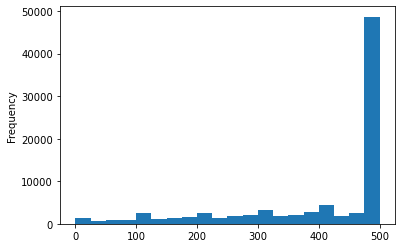

In [119]:
# Create bins for time_left

df['t_health'].plot.hist(bins=20)

In [137]:
data_5 = data_coded.copy()

time_bucket = []

for x in data_5['time_left']:
    if x <25:
        time_bucket.append('t25')
    elif x >= 25 and x < 50:
        time_bucket.append('t50')
    elif x >= 50 and x < 75:
        time_bucket.append('t75')
    elif x >= 75 and x < 100:
        time_bucket.append('t100')
    elif x >= 100 and x < 125:
        time_bucket.append('t125')
    elif x >= 125 and x < 150:
        time_bucket.append('t150')
    else:
        time_bucket.append('t175')

data_5['time_bucket'] = time_bucket

In [121]:
# data_5.groupby('time_bucket').agg({'time_bucket':'size',
#                                    'ct_score':['mean','min','max'],
#                                    't_score':['mean','min','max'],
#                                    'ct_player_health_index':['mean','min','max'],
#                                    't_player_health_index':['mean','min','max']
                                   
#                                   })

In [138]:
d5_target = [1 if x == 'CT' else 0 for x in data_5[target] ]

# encoding 
catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(data_5['time_bucket'],d5_target)
new_columns.add_suffix('_cb')

data_5_coded = pd.concat((data_5,new_columns),axis=1)


In [139]:
data_5_coded.drop(['time_bucket','time_left'],axis=1,inplace=True)

In [140]:
var = list(set(data_5_coded.columns) - set([target]))
rf_predictor(df = data_5_coded, var=var, model_version= 'rf with time buckets' )

                  model  Accuracy
0   rf baseline encoded  0.863617
1  rf with time buckets  0.866651
---------------------------------------
                 feature  importance
84               t_armor    0.076302
51              ct_armor    0.074755
52               t_money    0.056579
82              ct_money    0.055241
59                   map    0.051225
67             t_helmets    0.043755
45              t_health    0.033492
21               t_score    0.032801
75              ct_score    0.032525
17            ct_helmets    0.032235
28             ct_health    0.031554
92        ct_defuse_kits    0.029327
77  ct_grenade_flashbang    0.026476


RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700,
                       random_state=1)

In [129]:
# name

## 4. Model Selection 

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


classifiers = [
#     KNeighborsClassifier(2),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB()
#     QuadraticDiscriminantAnalysis()
#     LinearSVC(random_state=1)
#     SGDClassifier()
     GradientBoostingClassifier()
    
]

accuracy = []
names = []

X = data_5_coded[var]
y = data_5_coded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
    
for cl in classifiers:
    name = cl.__class__.__name__
          
    cl.fit(X_train,y_train)
    y_pred=cl.predict(X_test)
    
    model_metrics = accuracy_score(y_test, y_pred)
    
    try:
        names.append(name)
        accuracy.append(model_metrics)
        
    except:
        continue

data = {"Classifier":names, "Accuracy": accuracy}

perf_df = pd.DataFrame(data)

print(perf_df)

                   Classifier  Accuracy
0  GradientBoostingClassifier  0.756487


> **Random Forest is giving us the best result so far, next, perform hyperparameter tuning with cross validation.**


In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint.pp(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}


In [68]:
X = data_5_coded[var]
y = data_5_coded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 135.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [74]:
rf_predictor(df=data_5_coded,var=var,model_version='rf best estimators')

                model  Accuracy
0  rf best estimators  0.866301
                 feature  importance
66               t_armor    0.078151
6               ct_armor    0.074957
32               t_money    0.056850
70              ct_money    0.055575
85                   map    0.051507
35             t_helmets    0.044075
8               t_health    0.034902
81               t_score    0.032785
38              ct_score    0.032483
47             ct_health    0.032393
10            ct_helmets    0.031930
3         ct_defuse_kits    0.030224
73  ct_grenade_flashbang    0.026907


## Cross validation 

The above step is to search for the best hyperparameters with CV. However, we still want to make sure we can trust the model and parameters, with low bias and low variance

In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [143]:
rf = rf_predictor(df = data_5_coded, var=var, model_version= 'rf with time buckets' )

                  model  Accuracy
0   rf baseline encoded  0.863617
1  rf with time buckets  0.866651
2  rf with time buckets  0.866651
---------------------------------------
                 feature  importance
84               t_armor    0.076302
51              ct_armor    0.074755
52               t_money    0.056579
82              ct_money    0.055241
59                   map    0.051225
67             t_helmets    0.043755
45              t_health    0.033492
21               t_score    0.032801
75              ct_score    0.032525
17            ct_helmets    0.032235
28             ct_health    0.031554
92        ct_defuse_kits    0.029327
77  ct_grenade_flashbang    0.026476


In [144]:
rf

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=700,
                       random_state=1)

In [ ]:
scores = cross_val_score(rf, data_5_coded[var], data_5_coded[target], cv=5)
scores

## Final evaluation 

In [147]:
# val_data = pd.read_csv('validation_set.csv')
# target = 'round_winner'
# features = [column for column in data.columns if column != target]

# X_val = data[features]
# y_val = data[target]

# REPEAT ALL THE PROCESSING ON X_VAL

# call predict
